In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium

In [13]:
df2 = pd.read_csv("true_car_listings.csv")
df1 = pd.read_csv("tc20171021.csv", error_bad_lines=False, warn_bad_lines=False)


In [18]:
df = pd.concat([df1, df2]).drop('Id', axis = 1)
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068372 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Price    int64 
 1   Year     int64 
 2   Mileage  int64 
 3   City     object
 4   State    object
 5   Vin      object
 6   Make     object
 7   Model    object
dtypes: int64(3), object(5)
memory usage: 142.0+ MB


Number of cars per brand

In [20]:
Brand = df['Make'].value_counts()

In [21]:
Brand_df = Brand.to_frame().reset_index().rename(columns = {'index' : 'Brand Names','Make' : 'Number of cars'})

In [22]:
Brand_df.head()

,Brand Names,Number of cars
0,Ford,272431
1,Chevrolet,252694
2,Toyota,192881
3,Nissan,164960
4,Honda,127073


Top 10 Car Brands

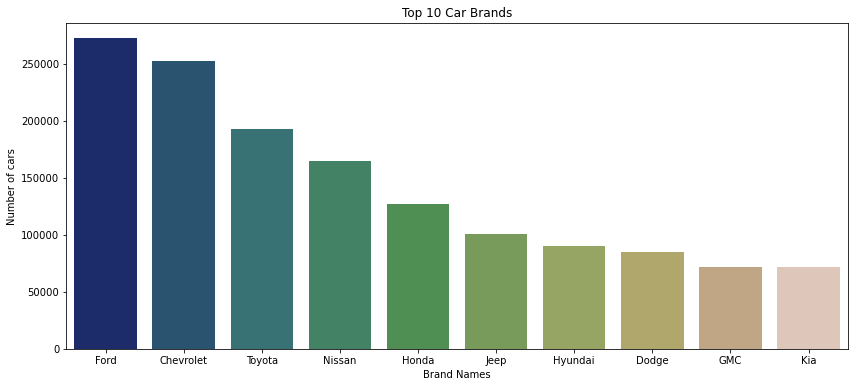

In [23]:
plt.figure(figsize = [14,6])

ax = sns.barplot(x=Brand_df['Brand Names'][:10], y = Brand_df['Number of cars'],palette = 'gist_earth')
plt.title("Top 10 Car Brands")
sns.set_context("talk")


In [24]:
Brand_df

,Brand Names,Number of cars
0,Ford,272431
1,Chevrolet,252694
2,Toyota,192881
3,Nissan,164960
4,Honda,127073
5,Jeep,100696
6,Hyundai,90484
7,Dodge,85056
8,GMC,72053
9,Kia,71470


 What's your favourite sports car? Well mine is **Lamborghini**. Lets checkout how many **lambos** we got here.

In [25]:
df[df['Make'] == 'Lamborghini']

,Price,Year,Mileage,City,State,Vin,Make,Model
230807,88995,2006,24442,Teterboro,NJ,ZHWGU22T66LA03668,Lamborghini,Gallardo
230808,89975,2007,28794,South River,NJ,ZHWGU22T07LA05322,Lamborghini,Gallardo2dr
230809,92999,2006,19708,Marrieta,GA,ZHWGU22T36LA04065,Lamborghini,Gallardo
230810,95555,2006,28813,Des Plaines,IL,ZHWGU12T66LA02711,Lamborghini,Gallardo2dr
230811,103785,2007,43940,Los Angeles,CA,ZHWGU22N47LA04904,Lamborghini,Gallardo2dr
...,...,...,...,...,...,...,...,...
549570,368889,2014,6322,New York,NY,ZHWUR1ZD0ELA02821,Lamborghini,AventadorConvertible
549571,379951,2014,1643,West Palm Beach,FL,ZHWUR1ZD4ELA02563,Lamborghini,AventadorConvertible
549572,399000,2015,2652,Costa Mesa,CA,ZHWUR1ZD7FLA03398,Lamborghini,AventadorConvertible
549573,462000,2017,261,Davie,FL,ZHWUC1ZD4HLA05825,Lamborghini,AventadorCoupe


We got **262** Lamborghinis in this dataset.

Ok now lets check how many **Lamborghinis** travelled less than 1000 miles.

In [26]:
lambo = df[df['Make'] == 'Lamborghini']

In [29]:
lambo[lambo['Mileage']<1000]

,Price,Year,Mileage,City,State,Vin,Make,Model
230818,149951,2012,326,West Palm Beach,FL,ZHWGU6BZ5CLA12076,Lamborghini,Gallardo2dr
230833,235000,2017,166,Davie,FL,ZHWUR2ZF6HLA07209,Lamborghini,HuracanRWD
230837,279951,2017,977,West Palm Beach,FL,ZHWUR1ZF0HLA05790,Lamborghini,HuracanSpyder
917213,205000,2017,936,Davie,FL,ZHWUC2ZF0HLA06123,Lamborghini,HuracanRWD
917221,220000,2015,465,Verona,NJ,ZHWUC1ZF3FLA02672,Lamborghini,HuracanLP
917229,233000,2015,585,Charlotte,NC,ZHWUC1ZF6FLA02990,Lamborghini,HuracanLP
917240,258000,2016,219,Davie,FL,ZHWUR1ZF4GLA05306,Lamborghini,HuracanLP
917255,462000,2017,261,Davie,FL,ZHWUC1ZD4HLA05825,Lamborghini,AventadorCoupe
917256,449995,2016,312,Saint James,NY,ZHWUR1ZD5GLA05118,Lamborghini,Aventador2dr
549503,149951,2012,326,West Palm Beach,FL,ZHWGU6BZ5CLA12076,Lamborghini,Gallardo2dr


In [34]:
import folium


m = folium.Map(location=[45.5236, -122.6750])
m